<a href="https://colab.research.google.com/github/MahirH21/Home-Loan-Approval-Prediction/blob/main/Classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries

In [ ]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

Reading the data from a csv file into a pandas dataframe

In [ ]:
loan = pd.read_csv('/content/loan_data.csv')

Dropping the ID Column

In [ ]:
loan.drop(columns=['Loan_ID'], inplace=True)

Taking a peek at our dataset


In [ ]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


Looking at the shape of our dataset - It has 150 rows and 4 columns




In [ ]:
loan.shape

(381, 12)

Inspecting what data types are store in the dataframe.

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         373 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


Removing Null Values

In [ ]:
#Credit to BHAVIK JIKADARA - https://www.kaggle.com/code/bhavikjikadara/loan-status-prediction-decisiontreeclassifier
#Formatting data and removing null
loan['Gender'] = loan['Gender'].fillna(loan['Gender'].mode().iloc[0])
loan['Self_Employed'] = loan['Self_Employed'].fillna(loan['Self_Employed'].mode().iloc[0])
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode().iloc[0]).astype(int)
loan['Credit_History'] = loan['Credit_History'].fillna(loan['Credit_History'].mode().iloc[0]).astype(int)
loan['Dependents'] = loan['Dependents'].replace(['0', '1', '2', '3+'], [0,1,2,3,])
loan['Dependents'] = loan['Dependents'].fillna(loan['Dependents'].mode().iloc[0])
loan['CoapplicantIncome'] = loan['CoapplicantIncome'].astype(int)
loan['LoanAmount'] = loan['LoanAmount'].astype(int)
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

GRAPH 1 APPLICANT INCOME VS LOAN AMOUNT JOINTPLOT

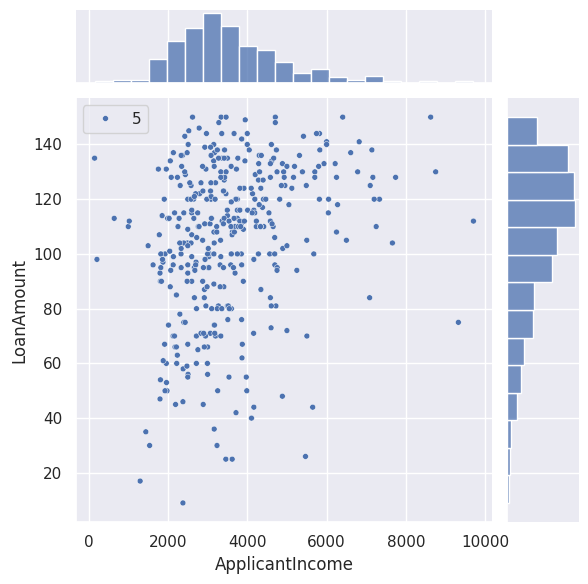

In [ ]:
#matplotlib is a python library for basic graph plotting
import matplotlib.pyplot as plt
#seaborn is another python graphing library that is built upon matplotlib and allows you to optimize matplotlib's output
import seaborn as sns
#switching from matplotlib's default graphing style to that of seaborn's. Seaborn displays graph lines, matplotlib doesn't
sns.set(color_codes = True)
#removing warnings from the output
import warnings
warnings.filterwarnings("ignore")

sns.jointplot(x = 'ApplicantIncome', y = 'LoanAmount', data = loan, size =5)
plt.show()

GRAPH 2 APPLICANT INCOME DENSITY BY LOAN STATUS

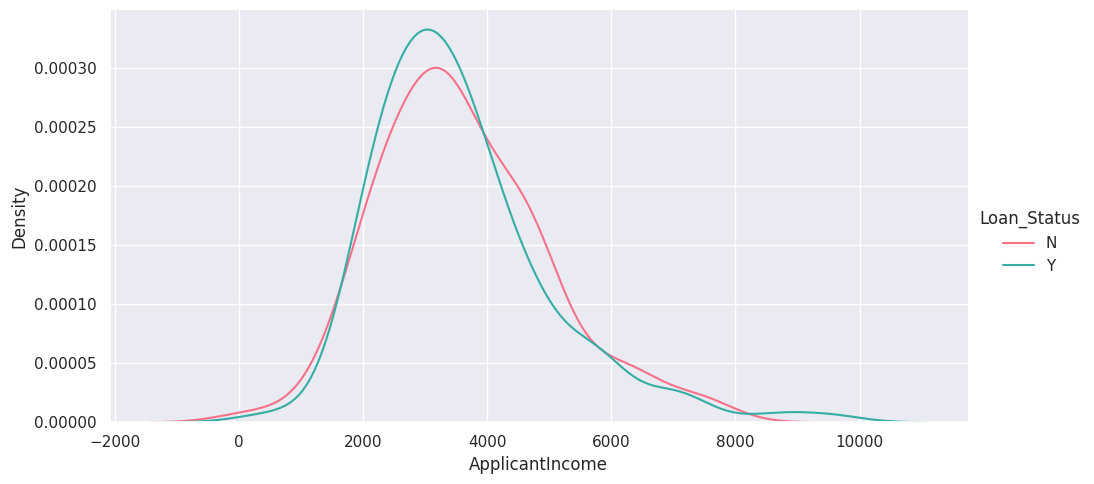

In [ ]:
sns.FacetGrid(loan, hue='Loan_Status', palette='husl',height=5, aspect=2).map(sns.kdeplot, 'ApplicantIncome').add_legend()
plt.show()

ONE HOT ENCODING

In [ ]:
#Credit to BHAVIK JIKADARA - https://www.kaggle.com/code/bhavikjikadara/loan-status-prediction-decisiontreeclassifier
def cat_to_num(loan, c_var):
    for i in c_var:
        uniques_value = loan[i].unique()
        loan[i].replace(uniques_value, [0, 1], inplace=True)

    for i in ['Property_Area']:
        uniques_value = loan[i].unique()
        loan[i].replace(uniques_value, [0, 1, 3], inplace=True)

c_variables = ['Gender', 'Married', 'Education', 'Education','Self_Employed', 'Loan_Status']

cat_to_num(loan, c_variables)


GRAPH 3 CORRELATION GRAPH

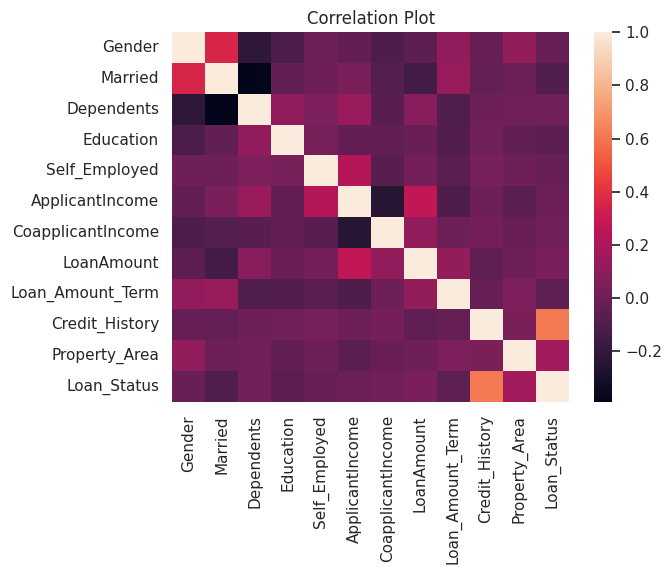

In [ ]:
sns.heatmap(loan[['Gender',	'Married',	'Dependents',	'Education','Self_Employed','ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History',	'Property_Area',	'Loan_Status']].corr())
plt.title('Correlation Plot')
plt.show()

Seeing fully formatted and encoded dataset

In [ ]:
loan.head()
#FOR LOAN STATUS
#0-NO
#1-YES

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1.0,0,0,4583,1508,128,360,1,0,0
1,0,0,0.0,0,1,3000,0,66,360,1,1,1
2,0,0,0.0,1,0,2583,2358,120,360,1,1,1
3,0,1,0.0,0,0,6000,0,141,360,1,1,1
4,0,0,0.0,1,0,2333,1516,95,360,1,1,1


Separating the features from the labels

In [ ]:
#Note the use of .vales and
#.values is used to extract the dataframe values to a numpy array
X = loan[['Gender',	'Married','Dependents',	'Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']].values

In [ ]:
y = loan[['Loan_Status']].values

Splitting the Dataset into Training and Test Sets


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

Feature Scaling - One method to rescale data is to standardize it.

To standardize a dataset means to scale all of the values in the dataset such that the mean value is 0 and the standard deviation is 1.


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting (Training) the models to the training dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#Note: here we are calling our KNN model knn. This is your choice.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

#We are using a Gaussian distribution for the Naive Bayes classifier hence we chose the GaussianNB model.
#For a list of other distributions, see here: https://scikit-learn.org/stable/modules/naive_bayes.html
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

#Training Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

#Training Random Forest
rf = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)
rf.fit(X_train,y_train)

#Below we are experimenting with various SVMs and different parameters
# Initialize SVM classifiers with probability estimates
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo', probability=True).fit(X_train, y_train.ravel())
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo', probability=True).fit(X_train, y_train.ravel())
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo', probability=True).fit(X_train, y_train.ravel())
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo', probability=True).fit(X_train, y_train.ravel())

Performing 5-Fold Cross Validation for KNN

In [ ]:
k = 5
kf = KFold(n_splits=k)

#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.8193570929419988


Performing 5-Fold Cross Validation for GNB

In [ ]:
#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(gnb, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.8419287211740041


Performing 5-fold Cross Validation on a Linear SVM

In [ ]:
#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(linear, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.8531795946890286


Performing 5 Fold Cross Validation on a RBF SVM

In [ ]:
#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(rbf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7326345213137666


Performing 5 fold Cross Validation on Poly SVM

In [ ]:
#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(poly, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.8381551362683439


Performing 5 Fold Cross Validation on Sigmoid SVM

In [ ]:
#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(sig, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.8457023060796646


Performing 5 Fold Cross Validation on Decision Tree

In [ ]:
result= cross_val_score(dt, X_train, y_train, cv=kf, scoring='accuracy')
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7744234800838574


Performing 5 Fold Cross Validation on Random Forest

In [ ]:
result = cross_val_score(rf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.8156533892382949


KNN - Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.44      0.56        34
           1       0.80      0.94      0.86        81

    accuracy                           0.79       115
   macro avg       0.78      0.69      0.71       115
weighted avg       0.79      0.79      0.77       115



GNB - Classification Report

In [ ]:
#Note - no need to import the classification_report libary again as it was done in the cell above
y_pred_gnb = gnb.predict(X_test)
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.94      0.44      0.60        34
           1       0.81      0.99      0.89        81

    accuracy                           0.83       115
   macro avg       0.87      0.71      0.74       115
weighted avg       0.85      0.83      0.80       115



Linear SVM Classification Report

In [ ]:
svm_linear_pred = linear.predict(X_test)

print(classification_report(y_test, svm_linear_pred))

              precision    recall  f1-score   support

           0       0.94      0.44      0.60        34
           1       0.81      0.99      0.89        81

    accuracy                           0.83       115
   macro avg       0.87      0.71      0.74       115
weighted avg       0.85      0.83      0.80       115



Poly SVM Classification Report

In [ ]:
svm_poly_pred = poly.predict(X_test)

print(classification_report(y_test, svm_poly_pred))

              precision    recall  f1-score   support

           0       0.75      0.44      0.56        34
           1       0.80      0.94      0.86        81

    accuracy                           0.79       115
   macro avg       0.78      0.69      0.71       115
weighted avg       0.79      0.79      0.77       115



Sig SVM Classification Report

In [ ]:
svm_sig_pred = sig.predict(X_test)
print(classification_report(y_test, svm_sig_pred))

              precision    recall  f1-score   support

           0       0.78      0.41      0.54        34
           1       0.79      0.95      0.87        81

    accuracy                           0.79       115
   macro avg       0.79      0.68      0.70       115
weighted avg       0.79      0.79      0.77       115



In [ ]:
svm_rbf_pred = rbf.predict(X_test)
print(classification_report(y_test, svm_rbf_pred))

              precision    recall  f1-score   support

           0       0.67      0.12      0.20        34
           1       0.72      0.98      0.83        81

    accuracy                           0.72       115
   macro avg       0.70      0.55      0.52       115
weighted avg       0.71      0.72      0.64       115



Decision Tree Classification Report

In [ ]:
#Getting parameters
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
#Note - we set what the target names are
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt, target_names = ['0', '1']))

              precision    recall  f1-score   support

           0       0.60      0.53      0.56        34
           1       0.81      0.85      0.83        81

    accuracy                           0.76       115
   macro avg       0.71      0.69      0.70       115
weighted avg       0.75      0.76      0.75       115



Random Forest Classification Report

In [ ]:
#Note - we set what the target names are
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf, target_names = ['0', '1']))

              precision    recall  f1-score   support

           0       0.68      0.44      0.54        34
           1       0.80      0.91      0.85        81

    accuracy                           0.77       115
   macro avg       0.74      0.68      0.69       115
weighted avg       0.76      0.77      0.76       115



STEP 6 AND 8 GRAPH

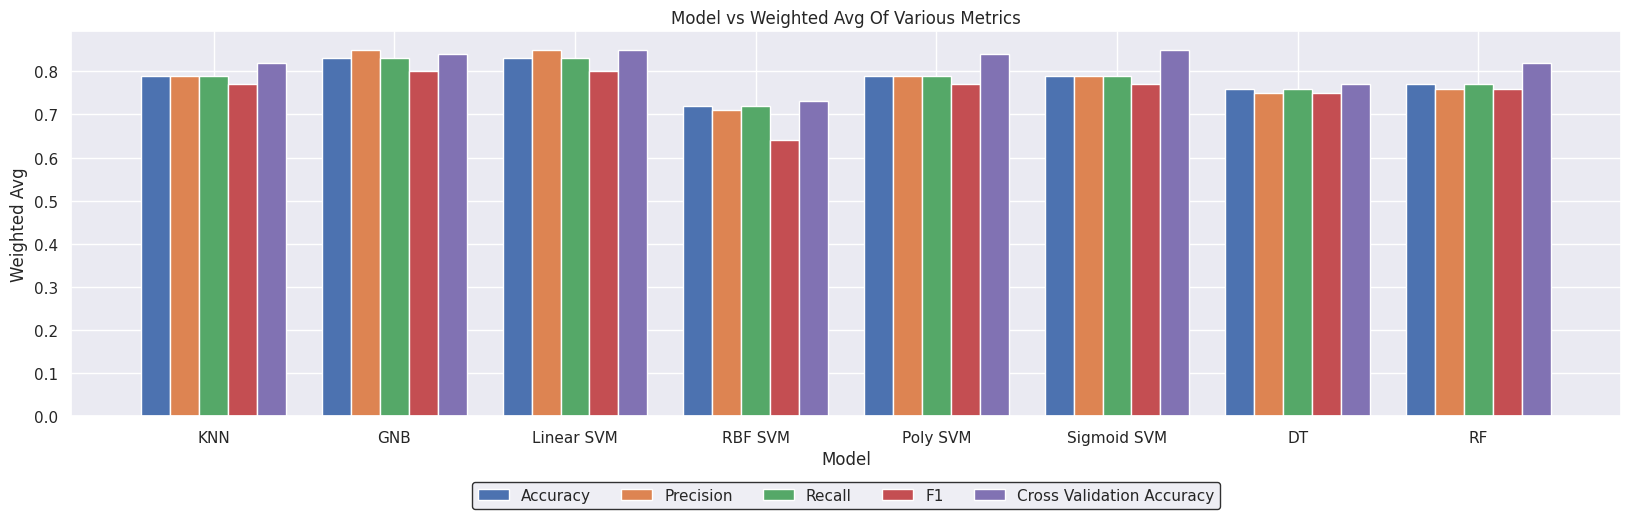

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Models
X = ['KNN', 'GNB','Linear SVM', 'RBF SVM', 'Poly SVM','Sigmoid SVM','DT', 'RF']

# Collect this information from the classification reports and store them in lists
accuracy = [0.79, 0.83, 0.83, 0.72, 0.79,0.79,0.76,0.77 ]
precision = [0.79, 0.85, 0.85, 0.71, 0.79, 0.79,0.75,0.76]
recall = [0.79, 0.83, 0.83, 0.72,0.79,0.79,0.76,0.77]
f1 = [0.77,0.80,0.80,0.64,0.77,0.77,0.75,0.76]
crossvalaccuracy=[0.82,0.84,0.85,0.73,0.84,0.85,0.77,0.82]

# Number of bars
n_bars = len(X)

# Number of groups of bars (accuracy, precision, recall, f1)
n_groups = 5

# Total width for each group of bars
total_width = 0.8

# Width for each individual bar within a group
bar_width = total_width / n_groups

# Calculate the center positions for each group of bars
X_axis = np.arange(len(X))

# Calculate the left positions for each individual bar within a group
left_positions = X_axis - (total_width - bar_width) / 2

# Setting the size of the graph
plt.rcParams["figure.figsize"] = (20, 5)

# Plotting the bars for each metric using the left positions and respective data
plt.bar(left_positions, accuracy, bar_width, label='Accuracy')
plt.bar(left_positions + bar_width, precision, bar_width, label='Precision')
plt.bar(left_positions + bar_width * 2, recall, bar_width, label='Recall')
plt.bar(left_positions + bar_width * 3, f1, bar_width, label='F1')
plt.bar(left_positions + bar_width * 4, crossvalaccuracy, bar_width, label='Cross Validation Accuracy')

# Setting the range of values for the X axis and labels
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")

#Credit to Chatgpt for formatting legend to bottom
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, edgecolor='black')

plt.show()


Exporting Linear SVM to model

In [ ]:
import pickle
with open('linearclassmodel.pkl', 'wb') as f:
    pickle.dump(linear, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)
